### TensorFlow 2.0 설치 및 Google Drive 연동

In [1]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 41kB/s 
     |████████████████████████████████| 450kB 33.7MB/s 
     |████████████████████████████████| 3.8MB 29.6MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# RNN Basics

RNN의 API의 사용법과, input shape, output shape 등의 기본적인 것들에 대해서 알아봅니다.

In [17]:
## library import
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)
print(keras.__version__)

2.0.0
2.2.4-tf


## Preparing Dataset

In [0]:
# One hot encoding for each char in 'hello'
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

![image](https://cloud.githubusercontent.com/assets/901975/23348727/cc981856-fce7-11e6-83ea-4b187473466b.png)

In [5]:
x_data = np.array([[h]], dtype=np.float32)

hidden_size = 2

rnn = layers.SimpleRNN(units=hidden_size, return_sequences=True,
                       return_state=True) # layers.SimpleRNNCell + layers.RNN

outputs, states = rnn(x_data)

print('x_data: {}, shape: {}'.format(x_data, x_data.shape))
print('outputs: {}, shape: {}'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]]], shape: (1, 1, 4)
outputs: [[[ 0.45738763 -0.22651993]]], shape: (1, 1, 2)
states: [[ 0.45738763 -0.22651993]], shape: (1, 2)


## Unfolding to n sequences

![image](https://cloud.githubusercontent.com/assets/901975/23383634/649efd0a-fd82-11e6-925d-8041242743b0.png)

In [6]:
# One cell RNN input_dim (4) -> output_dim (2). sequence: 5
x_data = np.array([[h, e, l, l, o]], dtype=np.float32)

hidden_size = 2
rnn = layers.SimpleRNN(units=2, return_sequences=True, return_state=True)    
outputs, states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]], shape: (1, 5, 4) 

outputs: [[[ 0.39869136 -0.12220392]
  [-0.5668643  -0.3517761 ]
  [-0.53968966 -0.90021396]
  [-0.7214478  -0.95862496]
  [ 0.6429564  -0.870333  ]]], shape: (1, 5, 2) 

states: [[ 0.6429564 -0.870333 ]], shape: (1, 2)


## Batching input

![image](https://cloud.githubusercontent.com/assets/901975/23383681/9943a9fc-fd82-11e6-8121-bd187994e249.png)

In [7]:
# One cell RNN input_dim (4) -> output_dim (2). sequence: 5, batch 3
# 3 batches 'hello', 'eolll', 'lleel'
x_data = np.array([[h, e, l, l, o],
                   [e, o, l, l, l],
                   [l, l, e, e, l]], dtype=np.float32)

hidden_size = 2
rnn = layers.SimpleRNN(units=2, return_sequences=True, return_state=True)    
outputs, states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[[-0.5724548   0.12095851]
  [ 0.06597783  0.6422297 ]
  [ 0.33876765  0.09046067]
  [ 0.04391865 -0.4151117 ]
  [-0.5783526   0.47098565]]

 [[ 0.27473798  0.21476218]
  [-0.00757593  0.5833242 ]
  [ 0.25704265  0.11883349]
  [ 0.02237039 -0.3434461 ]
  [-0.4562372  -0.39543357]]

 [[-0.2153866  -0.20658313]
  [-0.46999004 -0.14345208]
  [-0.09720588  0.48563507]
  [ 0.5599575   0.5137289 ]
  [ 0.47686064 -0.3729885 ]]], shape: (3, 5, 2) 

states: [[-0.5783526   0.47098565]
 [-0.4562372  -0.39543357]
 [ 0.47686064 -0.3729885 ]], shape: (3, 2)


## No return sequences

In [8]:
rnn = layers.SimpleRNN(units=2, return_sequences=False, return_state=True)    
outputs, states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[ 0.3224693  -0.854228  ]
 [-0.6309872  -0.12377494]
 [-0.8097964   0.2656391 ]], shape: (3, 2) 

states: [[ 0.3224693  -0.854228  ]
 [-0.6309872  -0.12377494]
 [-0.8097964   0.2656391 ]], shape: (3, 2)


## No return state

In [9]:
rnn = layers.SimpleRNN(units=2, return_sequences=False, return_state=False) 

outputs = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[-0.5727745   0.5840975 ]
 [-0.40546682 -0.6004089 ]
 [-0.27520514 -0.12635773]], shape: (3, 2) 



## GRU

In [10]:
rnn = layers.GRU(units=2, return_sequences=False, return_state=True)    
outputs, states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[-0.11380704 -0.13074817]
 [ 0.06605003 -0.19726552]
 [-0.10948157 -0.3543981 ]], shape: (3, 2) 

states: [[-0.11380704 -0.13074817]
 [ 0.06605003 -0.19726552]
 [-0.10948157 -0.3543981 ]], shape: (3, 2)


## LSTM

In [11]:
rnn = layers.LSTM(units=2, return_sequences=False, return_state=True)    
outputs, h_states, c_states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('hidden_states: {}, shape: {}'.format(h_states, h_states.shape))
print('cell_states: {}, shape: {}'.format(c_states, c_states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[ 0.00060103  0.03573105]
 [-0.03376094 -0.00616605]
 [ 0.05950198  0.00141355]], shape: (3, 2) 

hidden_states: [[ 0.00060103  0.03573105]
 [-0.03376094 -0.00616605]
 [ 0.05950198  0.00141355]], shape: (3, 2)
cell_states: [[ 0.00109577  0.06135139]
 [-0.09982577 -0.0153094 ]
 [ 0.16786793  0.00317466]], shape: (3, 2)


## Stacked RNN

In [12]:
model = keras.Sequential()
model.add(layers.SimpleRNN(2, return_sequences=True, input_shape=(5,4)))
model.add(layers.SimpleRNN(2, return_sequences=True))
model.add(layers.SimpleRNN(2, return_sequences=True))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 5, 2)              14        
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 5, 2)              10        
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 5, 2)              10        
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


# RNN을 이용하여 MNIST Classification 학습하기 
  

MNIST Image를 한 line씩 RNN에 입력하여 classification을 하는 실습을 해보겠습니다.

In [0]:
## HyperParameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
n_class = 10

In [0]:
## Data 준비
## MNIST Dataset #########################################################
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
##########################################################################

## Fashion MNIST Dataset #################################################
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
##########################################################################

In [25]:
## Dataset 만들기
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

n_train = train_images.shape[0]
n_test = test_images.shape[0]
print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


In [0]:
# pixel값을 0~1사이 범위로 조정
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

# label을 onehot-encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)    

# Dataset 구성
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(batch_size).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size).repeat()

In [0]:
## Model 만들기
def create_model():
    model = keras.Sequential()
    model.add(layers.LSTM(units=128, input_shape=(28,28)))
    model.add(layers.Dense(units=10, activation='softmax'))
    return model

In [28]:
model = create_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 128)               80384     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________


In [0]:
## model compile
model.compile(optimizers=keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
## Training
steps_per_epoch = n_train/batch_size
validation_steps = n_test/batch_size

In [31]:
history = model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Train for 600.0 steps, validate for 100.0 steps
Epoch 1/15
600/600 [==============================] - 12s 20ms/step - loss: 0.5127 - accuracy: 0.8326 - val_loss: 0.1724 - val_accuracy: 0.9460
Epoch 2/15
600/600 [==============================] - 9s 14ms/step - loss: 0.1434 - accuracy: 0.9563 - val_loss: 0.1150 - val_accuracy: 0.9647
Epoch 3/15
600/600 [==============================] - 9s 14ms/step - loss: 0.0930 - accuracy: 0.9719 - val_loss: 0.0824 - val_accuracy: 0.9748
Epoch 4/15
600/600 [==============================] - 8s 14ms/step - loss: 0.0698 - accuracy: 0.9785 - val_loss: 0.0763 - val_accuracy: 0.9773
Epoch 5/15
600/600 [==============================] - 8s 14ms/step - loss: 0.0557 - accuracy: 0.9823 - val_loss: 0.0630 - val_accuracy: 0.9799
Epoch 6/15
600/600 [==============================] - 8s 14ms/step - loss: 0.0462 - accuracy: 0.9855 - val_loss: 0.0612 - val_accuracy: 0.9814
Epoch 7/15
600/600 [==============================] - 8s 14ms/step - loss: 0.0390 - accuracy:

In [0]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img,cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(n_class), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(n_class), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

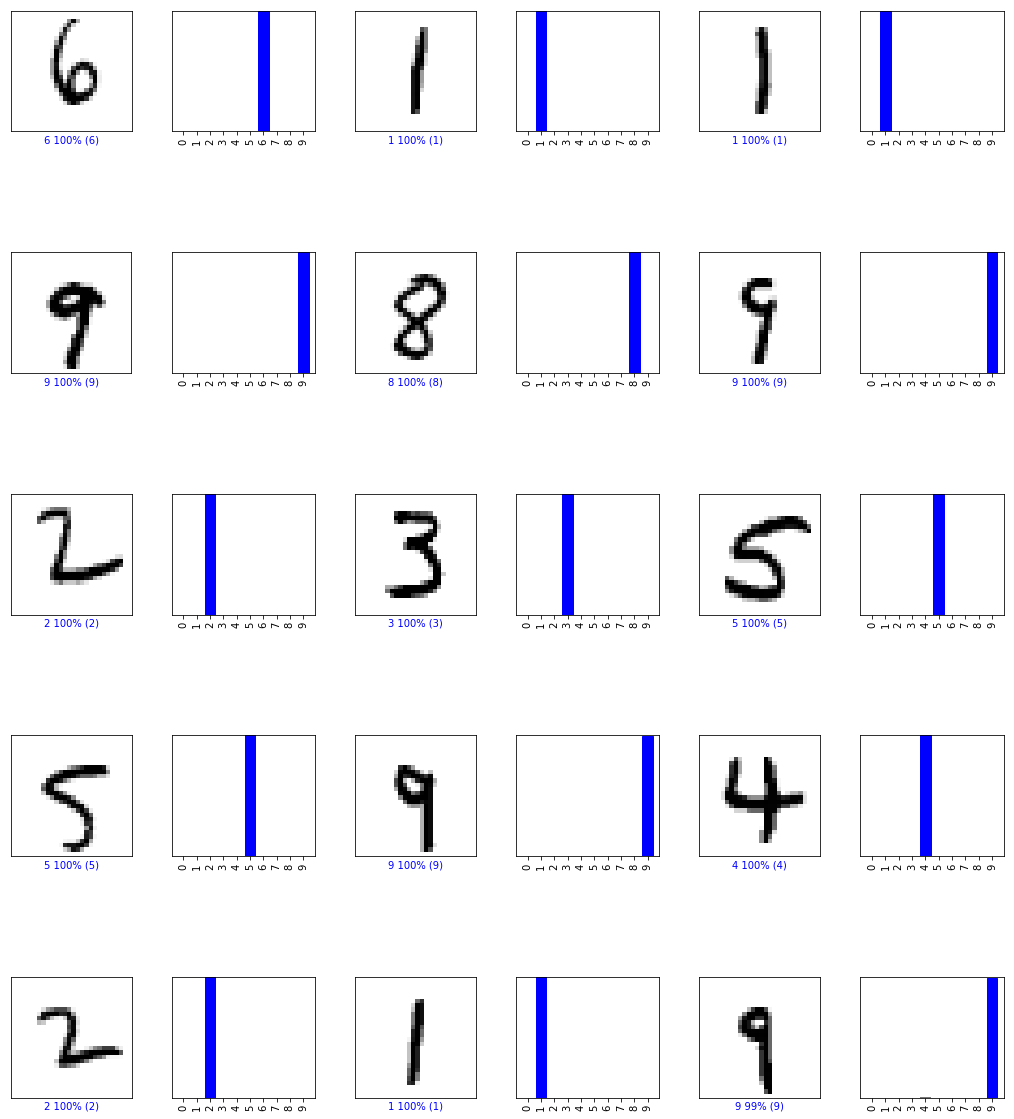

In [35]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

# Simple Language Model with RNN

RNN을 이용하여 간단한 language model을 학습시켜 보겠습니다.

In [0]:
## 학습시킬 문장
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

## index를 주면 charcter로 바꿔주는 list
idx2char = list(set(sentence))
## character를 주면 index로 바꿔주는 dictionary
char2idx = {w: i for i, w in enumerate(idx2char)}

In [37]:
idx2char

['p',
 'y',
 '.',
 'w',
 ' ',
 'm',
 ',',
 'i',
 'd',
 'b',
 'o',
 'r',
 't',
 'c',
 'a',
 'e',
 "'",
 'l',
 'g',
 'h',
 'n',
 'u',
 's',
 'f',
 'k']

In [38]:
char2idx

{' ': 4,
 "'": 16,
 ',': 6,
 '.': 2,
 'a': 14,
 'b': 9,
 'c': 13,
 'd': 8,
 'e': 15,
 'f': 23,
 'g': 18,
 'h': 19,
 'i': 7,
 'k': 24,
 'l': 17,
 'm': 5,
 'n': 20,
 'o': 10,
 'p': 0,
 'r': 11,
 's': 22,
 't': 12,
 'u': 21,
 'w': 3,
 'y': 1}

In [39]:
## HyperParameters
data_dim = len(idx2char)
hidden_size = len(idx2char)
num_classes = len(idx2char)
sequence_length = 10  # Any arbitrary number
learning_rate = 0.1
training_epochs = 500
print(num_classes)

25


In [40]:
## Dataset
dataX = []
dataY = []
for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length]
    y_str = sentence[i + 1: i + sequence_length + 1]
    print(i, x_str, '->', y_str)

    x = [char2idx[c] for c in x_str]  # x str to index
    y = [char2idx[c] for c in y_str]  # y str to index

    dataX.append(x)
    dataY.append(y)

batch_size = len(dataX)

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

In [41]:
dataX = np.array(to_categorical(dataX, num_classes))
dataY = np.array(to_categorical(dataY, num_classes))
print(dataX.shape, dataY.shape)
print(batch_size)

(170, 10, 25) (170, 10, 25)
170


In [0]:
train_dataset = tf.data.Dataset.from_tensor_slices((dataX, dataY)).shuffle(
                buffer_size=1000).prefetch(buffer_size=batch_size).batch(batch_size).repeat()

In [0]:
## Model 만들기
def create_model():
    model = keras.Sequential()
    model.add(layers.LSTM(units=hidden_size, return_sequences=True,
                                     input_shape=(dataX.shape[1],dataX.shape[2])))
    model.add(layers.LSTM(units=hidden_size, return_sequences=True))
    model.add(layers.Dense(units=num_classes, activation='softmax'))
    return model

In [44]:
model = create_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 10, 25)            5100      
_________________________________________________________________
lstm_5 (LSTM)                (None, 10, 25)            5100      
_________________________________________________________________
dense_3 (Dense)              (None, 10, 25)            650       
Total params: 10,850
Trainable params: 10,850
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy')

In [47]:
## Training
model.fit(train_dataset, epochs=training_epochs,
                    steps_per_epoch=dataX.shape[0]//batch_size)

Train for 1 steps
Epoch 1/500
1/1 [==============================] - 4s 4s/step - loss: 3.2198
Epoch 2/500
1/1 [==============================] - 0s 19ms/step - loss: 3.1106
Epoch 3/500
1/1 [==============================] - 0s 16ms/step - loss: 2.9646
Epoch 4/500
1/1 [==============================] - 0s 16ms/step - loss: 2.8899
Epoch 5/500
1/1 [==============================] - 0s 16ms/step - loss: 2.9052
Epoch 6/500
1/1 [==============================] - 0s 16ms/step - loss: 2.8530
Epoch 7/500
1/1 [==============================] - 0s 13ms/step - loss: 2.8438
Epoch 8/500
1/1 [==============================] - 0s 13ms/step - loss: 2.8177
Epoch 9/500
1/1 [==============================] - 0s 14ms/step - loss: 2.7800
Epoch 10/500
1/1 [==============================] - 0s 15ms/step - loss: 2.7389
Epoch 11/500
1/1 [==============================] - 0s 15ms/step - loss: 2.6802
Epoch 12/500
1/1 [==============================] - 0s 14ms/step - loss: 2.6413
Epoch 13/500
1/1 [===============

In [48]:
## 결과 확인
results = model.predict(dataX, steps=1)
for j, result in enumerate(results):
    index = np.argmax(result, axis=1)
    if j is 0:  # print all for the first result to make a sentence
        print(''.join([idx2char[t] for t in index]), end='')
    else:
        print(idx2char[index[-1]], end='')

f you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

# Simple Language Model with MLP

Multi-layer Perceptron을 이용하여 아주 간단한 language model을 학습시켜 보겠습니다.

In [49]:
## 학습시킬 문장
sentence = " if you want you"
## index를 주면 charcter로 바꿔주는 list
idx2char = list(set(sentence))
## character를 주면 index로 바꿔주는 dictionary
char2idx = {w: i for i, w in enumerate(idx2char)}

print(idx2char)
print(char2idx)

['y', 'o', 'i', 'w', 'u', 'a', 'n', ' ', 't', 'f']
{'y': 0, 'o': 1, 'i': 2, 'w': 3, 'u': 4, 'a': 5, 'n': 6, ' ': 7, 't': 8, 'f': 9}


In [51]:
## HyperParameters
data_dim = len(idx2char)
hidden_size = len(idx2char)
num_classes = len(idx2char)
sequence_length = 10  # Any arbitrary number
learning_rate = 0.1
batch_size = 1
training_epochs = 30
print(num_classes)

10


In [0]:
## Dataset 만들기
sentence_idx = [char2idx[c] for c in sentence]
dataX = [sentence_idx[:-1]]
dataY = [sentence_idx[1:]]

In [53]:
dataX = np.array(to_categorical(dataX, num_classes))
dataY = np.array(to_categorical(dataY, num_classes))
print(dataX.shape, dataY.shape)

(1, 15, 10) (1, 15, 10)


In [0]:
train_dataset = tf.data.Dataset.from_tensor_slices((dataX, dataY)).shuffle(
                buffer_size=1000).prefetch(buffer_size=batch_size).batch(batch_size).repeat()

In [0]:
## Model 만들기
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=num_classes, activation='relu',
                                input_shape=(dataX.shape[1],dataX.shape[2])))
    model.add(keras.layers.Dense(units=num_classes, activation='softmax'))
    return model

In [56]:
model = create_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 15, 10)            110       
_________________________________________________________________
dense_5 (Dense)              (None, 15, 10)            110       
Total params: 220
Trainable params: 220
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy')

In [58]:
## Training
model.fit(train_dataset, epochs=training_epochs,
                    steps_per_epoch=dataX.shape[0]//batch_size)

Train for 1 steps
Epoch 1/30
1/1 [==============================] - 1s 683ms/step - loss: 2.2341
Epoch 2/30
1/1 [==============================] - 0s 9ms/step - loss: 1.9410
Epoch 3/30
1/1 [==============================] - 0s 6ms/step - loss: 1.6720
Epoch 4/30
1/1 [==============================] - 0s 5ms/step - loss: 1.4008
Epoch 5/30
1/1 [==============================] - 0s 7ms/step - loss: 1.1321
Epoch 6/30
1/1 [==============================] - 0s 8ms/step - loss: 0.8940
Epoch 7/30
1/1 [==============================] - 0s 7ms/step - loss: 0.7006
Epoch 8/30
1/1 [==============================] - 0s 6ms/step - loss: 0.5530
Epoch 9/30
1/1 [==============================] - 0s 7ms/step - loss: 0.4514
Epoch 10/30
1/1 [==============================] - 0s 7ms/step - loss: 0.3874
Epoch 11/30
1/1 [==============================] - 0s 6ms/step - loss: 0.3499
Epoch 12/30
1/1 [==============================] - 0s 10ms/step - loss: 0.3303
Epoch 13/30
1/1 [==============================] - 0

In [59]:
## 결과 확인
results = model.predict(dataX, steps=1)
for j, result in enumerate(results):
    index = np.argmax(result, axis=1)
    if j is 0:  # print all for the first result to make a sentence
        print(''.join([idx2char[t] for t in index]), end='')
    else:
        print(idx2char[index[-1]], end='')

yf you yant you

# Stock Prediction with RNN  
RNN을 이용한 간단한 주식 예측 모델을 학습해보겠습니다.

In [0]:
## HyperParameters
seq_length = 7
data_dim = 5
hidden_size = 10
output_dim = 1
learning_rate = 0.001
training_epochs = 500
batch_size = 25

In [0]:
## Data Preprocessing
def MinMaxScaler(data):
    ''' Min Max Normalization
    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]
    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]
    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html
    '''
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [0]:
## Data 준비
# Open, High, Low, Volume, Close
xy = np.loadtxt('/content/drive/My Drive/new_drug_adv_tf/data/data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered)
xy = MinMaxScaler(xy).astype(np.float32)
x = xy
y = xy[:, [-1]]  # Close as label

In [63]:
# build a dataset
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]  # Next close price
    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

[[2.1375105e-01 2.0817982e-01 1.9179183e-01 4.6607511e-04 1.9209240e-01]
 [1.9393504e-01 2.0364192e-01 2.0866457e-01 2.9846733e-03 1.9655156e-01]
 [2.1051645e-01 2.0528941e-01 2.0355874e-01 2.5992651e-04 1.8774973e-01]
 [1.8667877e-01 2.0948057e-01 2.0878184e-01 0.0000000e+00 2.1744815e-01]
 [3.0697387e-01 3.1463414e-01 2.1899366e-01 1.2476472e-02 2.1698189e-01]
 [2.1914211e-01 2.6390722e-01 2.2468640e-01 4.5632339e-01 2.2496748e-01]
 [2.3312993e-01 2.3641916e-01 1.6268273e-01 5.7017118e-01 1.4744274e-01]] -> [0.13289961]
[[1.9393504e-01 2.0364192e-01 2.0866457e-01 2.9846733e-03 1.9655156e-01]
 [2.1051645e-01 2.0528941e-01 2.0355874e-01 2.5992651e-04 1.8774973e-01]
 [1.8667877e-01 2.0948057e-01 2.0878184e-01 0.0000000e+00 2.1744815e-01]
 [3.0697387e-01 3.1463414e-01 2.1899366e-01 1.2476472e-02 2.1698189e-01]
 [2.1914211e-01 2.6390722e-01 2.2468640e-01 4.5632339e-01 2.2496748e-01]
 [2.3312993e-01 2.3641916e-01 1.6268273e-01 5.7017118e-01 1.4744274e-01]
 [1.3431200e-01 1.5175878e-01 1.16

In [64]:
## Train/Test Split
train_size = int(len(dataY) * 0.7 + 18)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(
    dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(
    dataY[train_size:len(dataY)])
print(trainX.shape, trainY.shape)
print(testX.shape, testX.shape)

(525, 7, 5) (525, 1)
(200, 7, 5) (200, 7, 5)


In [0]:
## Dataset 만들기
train_dataset = tf.data.Dataset.from_tensor_slices((trainX, trainY)).shuffle(
                buffer_size=1000).prefetch(buffer_size=batch_size).batch(batch_size).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((testX, testY)).prefetch(
                buffer_size=batch_size).batch(batch_size)

In [0]:
## Model 만들기
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.LSTM(units=hidden_size, return_sequences=True,
                                     input_shape=(trainX.shape[1],trainX.shape[2])))
    model.add(keras.layers.LSTM(units=hidden_size))
    model.add(keras.layers.Dense(units=output_dim))
    return model

In [67]:
model = create_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 7, 10)             640       
_________________________________________________________________
lstm_7 (LSTM)                (None, 10)                840       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 1,491
Trainable params: 1,491
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate),
              loss='mse',
              metrics=[keras.metrics.RootMeanSquaredError()])

In [69]:
## Training
model.fit(train_dataset, epochs=training_epochs,
          steps_per_epoch=trainX.shape[0]//batch_size,
          validation_data=test_dataset,
          validation_steps=testX.shape[0]//batch_size)

Train for 21 steps, validate for 8 steps
Epoch 1/500
21/21 [==============================] - 5s 230ms/step - loss: 0.0760 - root_mean_squared_error: 0.2757 - val_loss: 0.0852 - val_root_mean_squared_error: 0.2919
Epoch 2/500
21/21 [==============================] - 0s 13ms/step - loss: 0.0094 - root_mean_squared_error: 0.0969 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0982
Epoch 3/500
21/21 [==============================] - 0s 12ms/step - loss: 0.0039 - root_mean_squared_error: 0.0626 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0428
Epoch 4/500
21/21 [==============================] - 0s 11ms/step - loss: 0.0033 - root_mean_squared_error: 0.0575 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0502
Epoch 5/500
21/21 [==============================] - 0s 12ms/step - loss: 0.0032 - root_mean_squared_error: 0.0570 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0620
Epoch 6/500
21/21 [==============================] - 0s 11ms/step - loss: 0.0031 - root_mean_squar

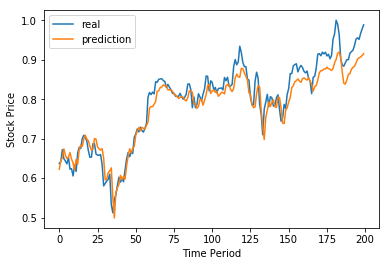

In [70]:
## 결과확인
prediction = model.predict(test_dataset)

plt.plot(testY)
plt.plot(prediction)
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.legend(['real', 'prediction'])
plt.show()

# IMDB dataset을 이용한 text classification

- forked from https://github.com/tensorflow/docs/blob/master/site/ko/tutorials/keras/text_classification.ipynb   


이번 실습에서는 IMDB(Internet Movie DataBase) dataset을 이용하여,   
영화평에 대한 긍정/부정의 sentimental anaylsis classification을 학습해봅니다.

In [71]:
## Data 준비
'''
imdb data를 loading합니다
num_words=vocab_size는 imdb data에서 가장 많이 등장하는 10000개의 단어만 선택하고,
나머지는 unknown 처리하게 합니다
'''

vocab_size = 10000
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)

17465344/17464789 [==============================] - 0s 0us/step


In [72]:
print("훈련 샘플: {}, 레이블: {}".format(len(train_data), len(train_labels)))

훈련 샘플: 25000, 레이블: 25000


In [73]:
## 첫번째 data가 어떻게 구성되어 있는지 확인
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [74]:
## 첫번째, 두번째 data의 단어 수 확인 - 각 data마다 단어 수가 다른 것을 알 수 있습니다
len(train_data[0]), len(train_data[1])

(218, 189)

In [75]:
## 단어와 정수 인덱스를 매핑한 딕셔너리
word_index = imdb.get_word_index()

## 처음 몇 개 인덱스는 사전에 정의되어 있습니다
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

## 정수를 입력받아서 text를 출력해주는 함수
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

1646592/1641221 [==============================] - 0s 0us/step


In [78]:
## 첫번째 data를 text로 바꾸어 출력
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [79]:
train_labels[0]

1

In [0]:
## 문장의 최대 단어수 지정
maxlen = 500

## RNN에 넣기 위하여 모든 문장을 최대 단어수로 맞춰줍니다
## 이 때 pad_sequence를 사용하여 문장의 뒷부분에 0(<PAD>)을 채우는 방식으로 padding을 해줍니다
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=maxlen)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=maxlen)

In [81]:
## padding이 잘 되었는지 확인
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [82]:
## Model 만들기
## word embedding에서 사용할 word vector의 크기를 지정
embedding_dim=16

## Model 만들기
## 여기서 CNN의 channel역할을 하는 것이 위에서 설정한 word vector의 크기입니다
## 즉 golbal average pooling을 하면 batch_size, channel의 2차원의 output이 나옵니다
model = keras.Sequential([
  layers.Embedding(vocab_size, embedding_dim, input_length=maxlen),
  layers.GlobalAveragePooling1D(),
  layers.Dense(16, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
## Train/Test data 나누기
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [86]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 2s 122us/sample - loss: 0.6925 - accuracy: 0.5226 - val_loss: 0.6917 - val_accuracy: 0.5402
Epoch 2/40
15000/15000 [==============================] - 1s 76us/sample - loss: 0.6897 - accuracy: 0.5633 - val_loss: 0.6872 - val_accuracy: 0.6186
Epoch 3/40
15000/15000 [==============================] - 1s 72us/sample - loss: 0.6826 - accuracy: 0.6938 - val_loss: 0.6783 - val_accuracy: 0.6872
Epoch 4/40
15000/15000 [==============================] - 1s 71us/sample - loss: 0.6697 - accuracy: 0.7027 - val_loss: 0.6624 - val_accuracy: 0.7611
Epoch 5/40
15000/15000 [==============================] - 1s 67us/sample - loss: 0.6487 - accuracy: 0.7736 - val_loss: 0.6389 - val_accuracy: 0.7714
Epoch 6/40
15000/15000 [==============================] - 1s 68us/sample - loss: 0.6191 - accuracy: 0.7862 - val_loss: 0.6075 - val_accuracy: 0.7856
Epoch 7/40
15000/15000 [==============================]

In [87]:
## 결과 확인
results = model.evaluate(test_data, test_labels)

print(results)

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [88]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

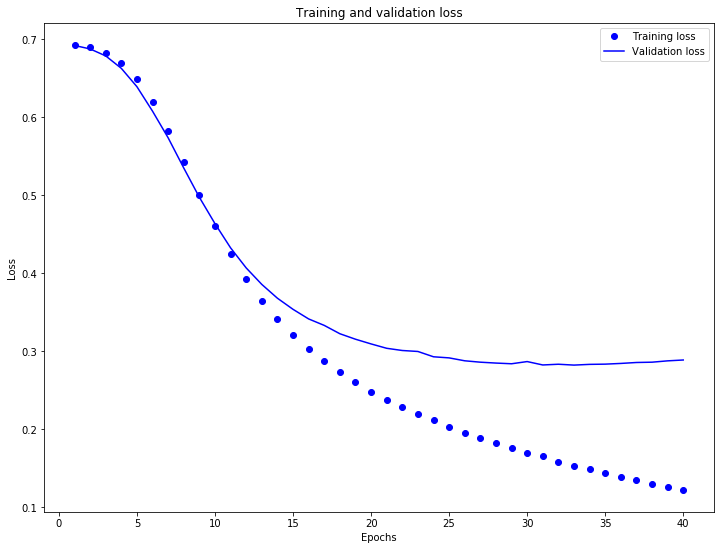

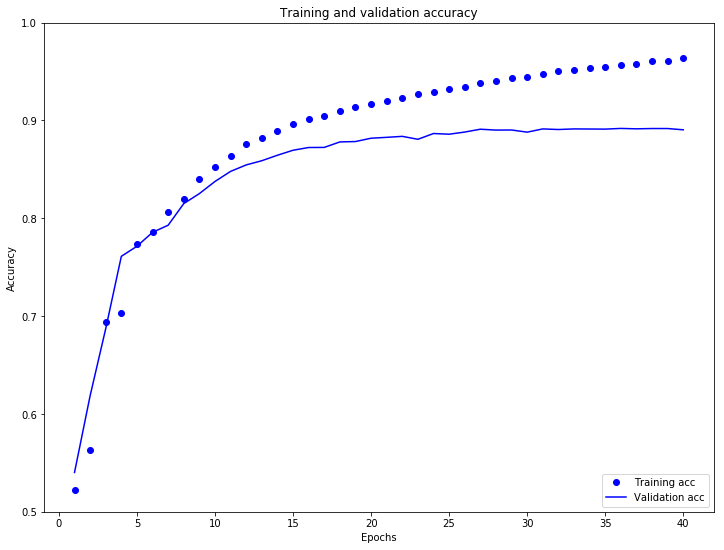

In [89]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

In [90]:
## embedding layer의 weight = embedding matrix
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [0]:
## visualization을 위한 tsv file write
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
## tsv file download
try:
    from google.colab import files
except ImportError:
    pass
else:
    files.download('vecs.tsv')
    files.download('meta.tsv')

## Visualize the embeddings

word embedding 결과를 확인하기 위하여 아래 link에 접속하여 tsv file을 upload 합니다

[Embedding Projector](http://projector.tensorflow.org/).

* Click on "Load data".

* Upload the two files we created above: ```vecs.tsv``` and ```meta.tsv```. T

위와 같이 실행하면 embedding 결과를 볼 수 있습니다. 
오른쪽에서 단어를 찾으면 가장 가까운 단어들을 순서대로 보여줍니다.


In [0]:
##

# 순환 신경망을 활용한 문자열 생성

- forked from https://www.tensorflow.org/beta/tutorials/text/text_generation

Note: 이 문서는 텐서플로 커뮤니티에서 번역했습니다. 커뮤니티 번역 활동의 특성상 정확한 번역과 최신 내용을 반영하기 위해 노력함에도 불구하고 [공식 영문 문서](https://github.com/tensorflow/docs/blob/r2.0rc/site/en/r2/tutorials/text/text_generation.ipynb)의 내용과 일치하지 않을 수 있습니다. 이 번역에 개선할 부분이 있다면 [tensorflow/docs](https://github.com/tensorflow/docs) 깃헙 저장소로 풀 리퀘스트를 보내주시기 바랍니다. 문서 번역이나 리뷰에 참여하려면 [docs-ko@tensorflow.org](https://groups.google.com/a/tensorflow.org/forum/#!forum/docs-ko)로 메일을 보내주시기 바랍니다.

이 튜토리얼에서는 문자 기반 순환 신경망(RNN, Recurrent Neural Network)을 사용하여 어떻게 텍스트를 생성하는지 설명합니다. Andrej Karpathy의 [순환 신경망의 뛰어난 효율](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)에서 가져온 셰익스피어 데이터셋으로 작업할 것입니다. 이 데이터 셋에서 문자 시퀀스 ("Shakespear")가 주어지면, 시퀀스의 다음 문자("e")를 예측하는 모델을 훈련합니다. 모델을 반복하여 호출하면 더 긴 텍스트 시퀀스 생성이 가능합니다.

Note: 이 노트북을 더 빠르게 실행하기 위해 GPU 가속을 활성화합니다. 코랩(Colab)에서: Runtime > Change runtime type > Hardware acclerator > GPU* 탭을 선택합니다. 로컬에서 실행하려면 TensorFlow 버전이 1.11 이상이어야 합니다.

이 튜토리얼은 [tf.keras](https://www.tensorflow.org/programmers_guide/keras)와 [즉시 실행(eager execution)](https://www.tensorflow.org/programmers_guide/eager)을 활용하여 구현된 실행 가능한 코드가 포함되어 있습니다. 다음은 이 튜토리얼의 30번의 에포크(Epoch)로 훈련된 모델에서 "Q" 문자열로 시작될 때의 샘플 출력입니다.

<pre>
QUEENE:
I had thought thou hadst a Roman; for the oracle,
Thus by All bids the man against the word,
Which are so weak of care, by old care done;
Your children were in your holy love,
And the precipitation through the bleeding throne.

BISHOP OF ELY:
Marry, and will, my lord, to weep in such a one were prettiest;
Yet now I was adopted heir
Of the world's lamentable day,
To watch the next way with his father with his face?

ESCALUS:
The cause why then we are all resolved more sons.

VOLUMNIA:
O, no, no, no, no, no, no, no, no, no, no, no, no, no, no, no, no, no, no, no, no, it is no sin it should be dead,
And love and pale as any will to that word.

QUEEN ELIZABETH:
But how long have I heard the soul for this world,
And show his hands of life be proved to stand.

PETRUCHIO:
I say he look'd on, if I must be content
To stay him from the fatal of our country's bliss.
His lordship pluck'd from this sentence then for prey,
And then let us twain, being the moon,
were she such a case as fills m
</pre>

문장 중 일부는 문법적으로 맞지만 대부분 자연스럽지 않습니다. 이 모델은 단어의 의미를 학습하지는 않았지만, 고려해야 할 점으로:

* 모델은 문자 기반입니다. 훈련이 시작되었을 때, 이 모델은 영어 단어의 철자를 모르거나 심지어 텍스트의 단위가 단어라는 것도 모릅니다.

* 출력의 구조는 대본과 유사합니다. 즉, 텍스트 블록은 대개 화자의 이름으로 시작하고 이 이름들은 모든 데이터셋에서 대문자로 씌여 있습니다.

* 아래에 설명된 것처럼 이 모델은 작은 텍스트 배치(각 100자)로 훈련되었으며 논리적인 구조를 가진 더 긴 텍스트 시퀀스를 생성할 수 있습니다.

In [93]:
## Data 준비
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

1122304/1115394 [==============================] - 0s 0us/step


In [94]:
# 읽은 다음 파이썬 2와 호환되도록 디코딩합니다.
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
# 텍스트의 길이는 그 안에 있는 문자의 수입니다.
print ('텍스트의 길이: {}자'.format(len(text)))

텍스트의 길이: 1115394자


In [95]:
# 텍스트의 처음 250자를 살펴봅니다
print(text[:250])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



In [96]:
# 파일의 고유 문자수를 출력합니다.
vocab = sorted(set(text))
print ('고유 문자수 {}개'.format(len(vocab)))

고유 문자수 65개


In [0]:
# 고유 문자에서 인덱스로 매핑 생성
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

text_as_int = np.array([char2idx[c] for c in text])

In [98]:
print('{')
for char,_ in zip(char2idx, range(20)):
    print('  {:4s}: {:3d},'.format(repr(char), char2idx[char]))
print('  ...\n}')

{
  '\n':   0,
  ' ' :   1,
  '!' :   2,
  '$' :   3,
  '&' :   4,
  "'" :   5,
  ',' :   6,
  '-' :   7,
  '.' :   8,
  '3' :   9,
  ':' :  10,
  ';' :  11,
  '?' :  12,
  'A' :  13,
  'B' :  14,
  'C' :  15,
  'D' :  16,
  'E' :  17,
  'F' :  18,
  'G' :  19,
  ...
}


In [99]:
# 텍스트에서 처음 13개의 문자가 숫자로 어떻게 매핑되었는지를 보여줍니다
print ('{} ---- 문자들이 다음의 정수로 매핑되었습니다 ---- > {}'.format(repr(text[:13]), text_as_int[:13]))

'First Citizen' ---- 문자들이 다음의 정수로 매핑되었습니다 ---- > [18 47 56 57 58  1 15 47 58 47 64 43 52]


### 예측 과정

주어진 문자나 문자 시퀀스가 주어졌을 때, 다음 문자로 가장 가능성 있는 문자는 무엇일까요? 이는 모델을 훈련하여 수행할 작업입니다. 모델의 입력은 문자열 시퀀스가 될 것이고, 모델을 훈련시켜 출력을 예측합니다. 이 출력은 현재 타임 스텝(time step)의 다음 문자입니다.

RNN은 이전에 본 요소에 의존하는 내부 상태를 유지하고 있으므로, 이 순간까지 계산된 모든 문자를 감안할 때, 다음 문자는 무엇일까요?

### 훈련 샘플과 타깃 만들기

다음으로 텍스트를 샘플 시퀀스로 나눕니다. 각 입력 시퀀스에는 텍스트에서 나온 `seq_length`개의 문자가 포함될 것입니다.

각 입력 시퀀스에서, 해당 타깃은 한 문자를 오른쪽으로 이동한 것을 제외하고는 동일한 길이의 텍스트를 포함합니다.

따라서 텍스트를`seq_length + 1`개의 청크(chunk)로 나눕니다. 예를 들어, `seq_length`는 4이고 텍스트를 "Hello"이라고 가정해 봅시다. 입력 시퀀스는 "Hell"이고 타깃 시퀀스는 "ello"가 됩니다.

이렇게 하기 위해 먼저 `tf.data.Dataset.from_tensor_slices` 함수를 사용해 텍스트 벡터를 문자 인덱스의 스트림으로 변환합니다.

In [100]:
# 단일 입력에 대해 원하는 문장의 최대 길이
seq_length = 100
examples_per_epoch = len(text)//seq_length

# 훈련 샘플/타깃 만들기
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

for i in char_dataset.take(5):
  print(idx2char[i.numpy()])

F
i
r
s
t


In [101]:
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

for item in sequences.take(5):
  print(repr(''.join(idx2char[item.numpy()])))

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '
'are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you k'
"now Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us ki"
"ll him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be d"
'one: away, away!\n\nSecond Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citi'


In [0]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

In [103]:
## 첫 번째 data와 label 확인
for input_example, target_example in  dataset.take(1):
  print ('입력 데이터: ', repr(''.join(idx2char[input_example.numpy()])))
  print ('타깃 데이터: ', repr(''.join(idx2char[target_example.numpy()])))

입력 데이터:  'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'
타깃 데이터:  'irst Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '


In [104]:
for i, (input_idx, target_idx) in enumerate(zip(input_example[:5], target_example[:5])):
    print("{:4d}단계".format(i))
    print("  입력: {} ({:s})".format(input_idx, repr(idx2char[input_idx])))
    print("  예상 출력: {} ({:s})".format(target_idx, repr(idx2char[target_idx])))

   0단계
  입력: 18 ('F')
  예상 출력: 47 ('i')
   1단계
  입력: 47 ('i')
  예상 출력: 56 ('r')
   2단계
  입력: 56 ('r')
  예상 출력: 57 ('s')
   3단계
  입력: 57 ('s')
  예상 출력: 58 ('t')
   4단계
  입력: 58 ('t')
  예상 출력: 1 (' ')


In [105]:
# 배치 크기
BATCH_SIZE = 64

# 데이터셋을 섞을 버퍼 크기
# (TF 데이터는 무한한 시퀀스와 함께 작동이 가능하도록 설계되었으며,
# 따라서 전체 시퀀스를 메모리에 섞지 않습니다. 대신에,
# 요소를 섞는 버퍼를 유지합니다).
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

dataset

<BatchDataset shapes: ((64, 100), (64, 100)), types: (tf.int64, tf.int64)>

## 모델 설계

모델을 정의하려면 `tf.keras.Sequential`을 사용합니다. 이 간단한 예제에서는 3개의 층을 사용하여 모델을 정의합니다:

* `tf.keras.layers.Embedding` : 입력층. `embedding_dim` 차원 벡터에 각 문자의 정수 코드를 매핑하는 훈련 가능한 검색 테이블.
* `tf.keras.layers.GRU` : 크기가 `units = rnn_units`인 RNN의 유형(여기서 LSTM층을 사용할 수도 있습니다.)
* `tf.keras.layers.Dense` : 크기가 `vocab_size`인 출력을 생성하는 출력층.

In [0]:
# 문자로 된 어휘 사전의 크기
vocab_size = len(vocab)

# 임베딩 차원
embedding_dim = 256

# RNN 유닛(unit) 개수
rnn_units = 1024

In [0]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
    tf.keras.layers.LSTM(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)
  ])
  return model

In [0]:
model = build_model(
  vocab_size = len(vocab),
  embedding_dim=embedding_dim,
  rnn_units=rnn_units,
  batch_size=BATCH_SIZE)

In [109]:
for input_example_batch, target_example_batch in dataset.take(1):
  example_batch_predictions = model(input_example_batch)
  print(example_batch_predictions.shape, "# (배치 크기, 시퀀스 길이, 어휘 사전 크기)")

(64, 100, 65) # (배치 크기, 시퀀스 길이, 어휘 사전 크기)


In [0]:
'''모델로부터 실제 예측을 얻으려면 출력 배열에서 샘플링하여 실제 문자 인덱스를 얻어야 합니다. 이 분포는 문자 어휘에 대한 로짓에 의해 정의됩니다.

Note: 배열에 argmax를 취하면 모델이 쉽게 루프에 걸릴 수 있으므로 배열에서 샘플링하는 것이 중요합니다.

배치의 첫 번째 샘플링을 시도해 봅시다:'''

sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices,axis=-1).numpy()

In [111]:
'''이렇게 하면 각 타임 스텝(time step)에서 다음 문자 인덱스에 대한 예측을 제공합니다:'''

sampled_indices

array([10, 57, 15,  9, 43,  4, 30, 33, 35, 47, 37,  4, 15, 18, 55,  3, 50,
       30, 61, 54, 38, 26, 18, 18, 51,  4, 10, 24, 12, 23,  3, 58,  2, 63,
       37, 32, 20,  5, 59,  7,  5,  5, 29, 49, 25, 63, 44,  8, 35, 12, 16,
       50,  9, 27, 13, 57, 18, 12, 61,  8, 14, 28, 26,  2,  0, 46, 30, 45,
       14, 59, 17, 48, 36, 37, 29, 16, 16, 48, 15,  4, 22, 26, 64, 27, 57,
       34, 38, 33, 24,  3, 63, 45, 51, 27,  2, 48, 14, 15, 64, 28])

In [112]:
'''훈련되지 않은 모델에 의해 예측된 텍스트를 보기 위해 복호화합니다.'''

print("입력: \n", repr("".join(idx2char[input_example_batch[0]])))
print()
print("예측된 다음 문자: \n", repr("".join(idx2char[sampled_indices ])))

입력: 
 'is and mine, yet were it true\nTo say this boy were like me. Come, sir page,\nLook on me with your wel'

예측된 다음 문자: 
 ":sC3e&RUWiY&CFq$lRwpZNFFm&:L?K$t!yYTH'u-''QkMyf.W?Dl3OAsF?w.BPN!\nhRgBuEjXYQDDjC&JNzOsVZUL$ygmO!jBCzP"


In [113]:
## Loss function
def loss(labels, logits):
  return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

example_batch_loss  = loss(target_example_batch, example_batch_predictions)
print("예측 배열 크기(shape): ", example_batch_predictions.shape, " # (배치 크기, 시퀀스 길이, 어휘 사전 크기")
print("스칼라 손실:          ", example_batch_loss.numpy().mean())

예측 배열 크기(shape):  (64, 100, 65)  # (배치 크기, 시퀀스 길이, 어휘 사전 크기
스칼라 손실:           4.175319


In [0]:
model.compile(optimizer='adam', loss=loss)

In [0]:
## Callback을 이용한 checkpoint 저장

# 체크포인트가 저장될 디렉토리
checkpoint_dir = './training_checkpoints'
# 체크포인트 파일 이름
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [0]:
## Epoch 설정
EPOCHS=30

In [117]:
## Training
history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

Epoch 1/30
172/172 [==============================] - 33s 194ms/step - loss: 2.5421
Epoch 2/30
172/172 [==============================] - 32s 184ms/step - loss: 1.8568
Epoch 3/30
172/172 [==============================] - 31s 183ms/step - loss: 1.6142
Epoch 4/30
172/172 [==============================] - 31s 182ms/step - loss: 1.4858
Epoch 5/30
172/172 [==============================] - 31s 183ms/step - loss: 1.4071
Epoch 6/30
172/172 [==============================] - 31s 182ms/step - loss: 1.3525
Epoch 7/30
172/172 [==============================] - 31s 182ms/step - loss: 1.3073
Epoch 8/30
172/172 [==============================] - 32s 184ms/step - loss: 1.2683
Epoch 9/30
172/172 [==============================] - 32s 183ms/step - loss: 1.2317
Epoch 10/30
172/172 [==============================] - 32s 184ms/step - loss: 1.1944
Epoch 11/30
172/172 [==============================] - 31s 183ms/step - loss: 1.1574
Epoch 12/30
172/172 [==============================] - 32s 185ms/step - lo

In [118]:
## latest checkpoint 확인
tf.train.latest_checkpoint(checkpoint_dir)

'./training_checkpoints/ckpt_30'

In [0]:
## 새 model 생성 후 weight load
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)

model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

model.build(tf.TensorShape([1, None]))

In [120]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (1, None, 256)            16640     
_________________________________________________________________
lstm_9 (LSTM)                (1, None, 1024)           5246976   
_________________________________________________________________
dense_12 (Dense)             (1, None, 65)             66625     
Total params: 5,330,241
Trainable params: 5,330,241
Non-trainable params: 0
_________________________________________________________________


In [0]:
## 생성 결과 확인

def generate_text(model, start_string):
  # 평가 단계 (학습된 모델을 사용하여 텍스트 생성)

  # 생성할 문자의 수
  num_generate = 1000

  # 시작 문자열을 숫자로 변환(벡터화)
  input_eval = [char2idx[s] for s in start_string]
  input_eval = tf.expand_dims(input_eval, 0)
  

  # 결과를 저장할 빈 문자열
  text_generated = []

  # 온도가 낮으면 더 예측 가능한 텍스트가 됩니다.
  # 온도가 높으면 더 의외의 텍스트가 됩니다.
  # 최적의 세팅을 찾기 위한 실험
  temperature = 1
  
  # 여기에서 배치 크기 == 1
  #odel.reset_states()
  for i in range(num_generate):      
      predictions = model(input_eval)
      # 배치 차원 제거
      predictions = tf.squeeze(predictions, 0)

      # 범주형 분포를 사용하여 모델에서 리턴한 단어 예측
      predictions = predictions / temperature
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

      # 예측된 단어를 다음 입력으로 모델에 전달
      # 이전 은닉 상태와 함께
      input_eval = tf.expand_dims([predicted_id], 0)

      text_generated.append(idx2char[predicted_id])

  return (start_string + ''.join(text_generated))

In [122]:
print(generate_text(model, start_string=u"ROMEO: "))

ROMEO: down? what is the want of sorrow?
O God, that with sweet stand's up with you,
Water that news, what enter'd but
I cannot cushardly come against my hand words
That's guilty of,
Let me entreat the sharp way fright, the rest
which heaven with a feeling of thy tongue ruth, not revenge
That thou darest not this while a fresh-born dugger's hand
'Twere goodled. I shall to deserve his health
To undergo:

GRUMIO:
I pray you, I'll assure her, Petruchio means to twenty,
Against the Duke of Venom and deforment.

QUEEN ELIZABETH:
Wilt thou be patient, truly, that thou hast no charged now. I am glad to do this matter fortune's dishmend
And take against his single toward our father's death,
And what is not warm'd with a dear-like beasts,
Either than the earth coming.

BENVOLIO:
Not to themselves; my mind is call your king;
And all the charlets rifes fear, that vow but leaved
My prayer is done; 'twould know my heart can give you
Of Hortensio's signoration, you were copparied.

SAMPSON:
Sir, wha